Automatically created module for IPython interactive environment


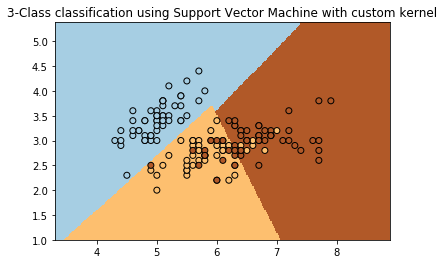

In [36]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target


def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()

Automatically created module for IPython interactive environment


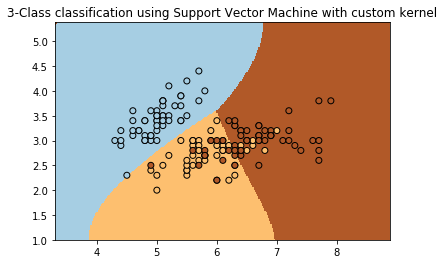

In [37]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics.pairwise import check_pairwise_arrays
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target

def rbf_kernel(X, Y=None, gamma=None):
    """
    Compute the rbf (gaussian) kernel between X and Y::
        K(x, y) = exp(-gamma ||x-y||^2)
    for each pair of rows x in X and y in Y.
    Read more in the :ref:`User Guide <rbf_kernel>`.
    Parameters
    ----------
    X : array of shape (n_samples_X, n_features)
    Y : array of shape (n_samples_Y, n_features)
    gamma : float, default None
        If None, defaults to 1.0 / n_features
    Returns
    -------
    kernel_matrix : array of shape (n_samples_X, n_samples_Y)
    """
    X, Y = check_pairwise_arrays(X, Y)
    if gamma is None:
        gamma = 1.0 / X.shape[1]

    K = euclidean_distances(X, Y, squared=True)
    K *= -gamma
    np.exp(K, K)  # exponentiate K in-place
    return K

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=rbf_kernel)
clf.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()

Automatically created module for IPython interactive environment
Using gamma: 0.5
Using gamma: 0.5
0.7631578947368421
Using gamma: 0.5


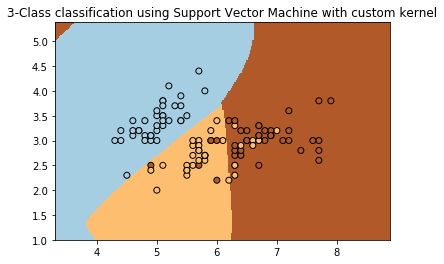

In [38]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics.pairwise import check_pairwise_arrays
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
%matplotlib inline

# import some data to play with
iris = datasets.load_iris()
Xf = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Yf = iris.target

X_train, X_test, y_train, y_test = train_test_split(Xf, Yf, random_state=0)

def rbf_kernel(X, Y=None, gamma=None):
    """
    Compute the rbf (gaussian) kernel between X and Y::
        K(x, y) = exp(-gamma ||x-y||^2)
    for each pair of rows x in X and y in Y.
    Read more in the :ref:`User Guide <rbf_kernel>`.
    Parameters
    ----------
    X : array of shape (n_samples_X, n_features)
    Y : array of shape (n_samples_Y, n_features)
    gamma : float, default None
        If None, defaults to 1.0 / n_features
    Returns
    -------
    kernel_matrix : array of shape (n_samples_X, n_samples_Y)
    """
    X, Y = check_pairwise_arrays(X, Y)
    if gamma is None:
        gamma = 1.0 / X.shape[1]
    print("Using gamma:", gamma)

    K = euclidean_distances(X, Y, squared=True)
    K *= -gamma
    np.exp(K, K)  # exponentiate K in-place
    return K

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=rbf_kernel)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()

In [39]:
clf2 = svm.SVC(kernel="rbf", gamma=.5)
clf2.fit(X_train, y_train)
print(clf2.score(X_test, y_test))

0.7631578947368421


Automatically created module for IPython interactive environment


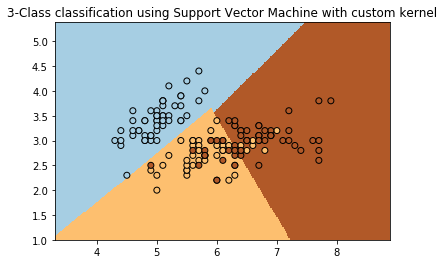

In [40]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics.pairwise import check_pairwise_arrays
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import safe_sparse_dot
%matplotlib inline

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target

def linear_kernel(X, Y=None, dense_output=True):
    """
    Compute the linear kernel between X and Y.
    Read more in the :ref:`User Guide <linear_kernel>`.
    Parameters
    ----------
    X : array of shape (n_samples_1, n_features)
    Y : array of shape (n_samples_2, n_features)
    dense_output : boolean (optional), default True
        Whether to return dense output even when the input is sparse. If
        ``False``, the output is sparse if both input arrays are sparse.
        .. versionadded:: 0.20
    Returns
    -------
    Gram matrix : array of shape (n_samples_1, n_samples_2)
    """
    X, Y = check_pairwise_arrays(X, Y)
    return safe_sparse_dot(X, Y.T, dense_output=dense_output)

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=linear_kernel)
clf.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()